# Análise exploratória e Data Wrangling pra E-Commerce Analytics

OBS: Grande projeto que envolverá 3 capitulos <br>
    <ul>
        <li>**Análise Exploratória dos Dados**
        <li>Engenharia de Atributos
        <li>Pré Processamento dos Dados
    </ul>
     

In [204]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [205]:
# Parametros de configurações dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12,4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [206]:
# Carregando Dataset

In [207]:
dataSet = pd.read_csv("dados/dataset.csv")

In [208]:
dataSet.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [209]:
dataSet.shape

(11000, 12)

In [210]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [211]:
dataSet.sample(5) # Amostra aleatória dos dados

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
7638,7639,D,Navio,5,2,123,5,baixa,F,4,5284,0
4636,4637,C,Caminhao,4,2,231,6,baixa,M,8,5227,0
966,967,D,Aviao,4,5,163,4,baixa,F,49,1470,1
8883,8884,B,Caminhao,5,3,270,5,media,M,9,1764,1
3684,3685,D,Caminhao,4,3,258,2,baixa,F,2,4308,0


# EDA - Parte 1
### Separação de variáveis Categóricas e Numéricas

In [212]:
dataSet.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [213]:
dataSet.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [214]:
# lista de colunas categóricas
cats = ['corredor_armazem', 'modo_envio', 'prioridade_produto', 'genero']

# Lista de colunas numéricas
nums = ['numero_chamadas_cliente', 'avaliacao_cliente', 'custo_produto', 'compras_anteriores', 
        'desconto', 'peso_gramas']

In [215]:
dataSet['entregue_no_prazo'].value_counts()

entregue_no_prazo
1    6563
0    4437
Name: count, dtype: int64

In [216]:
target = ['entregue_no_prazo'] # Variável alvo

## Explorando variáveis numéricas

In [217]:
dataSet[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


Algumas observações:

1. As colunas `numero_chamadas_cliente`, `avaliacao_cliente` e `custo_produto` parecem ter uma distribuição bastante simétrica (média e mediana não são muito diferentes).

2. As colunas `compras_anteriores` e `desconto` parecem estar inclinadas para a direita (Média maior do que a Mediana).

3. A coluna `peso_gramas` parece estar mais inclinada para a esquerda (Média menor do que a Mediana).

<Axes: >

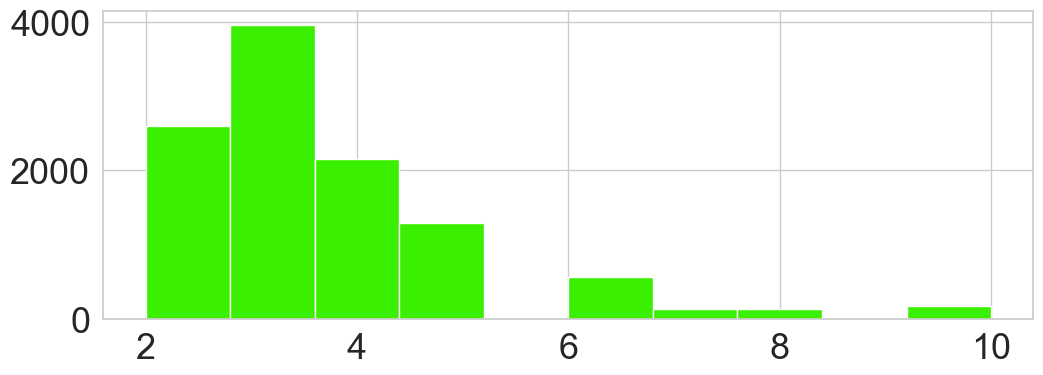

In [218]:
dataSet['compras_anteriores'].hist()

<Axes: >

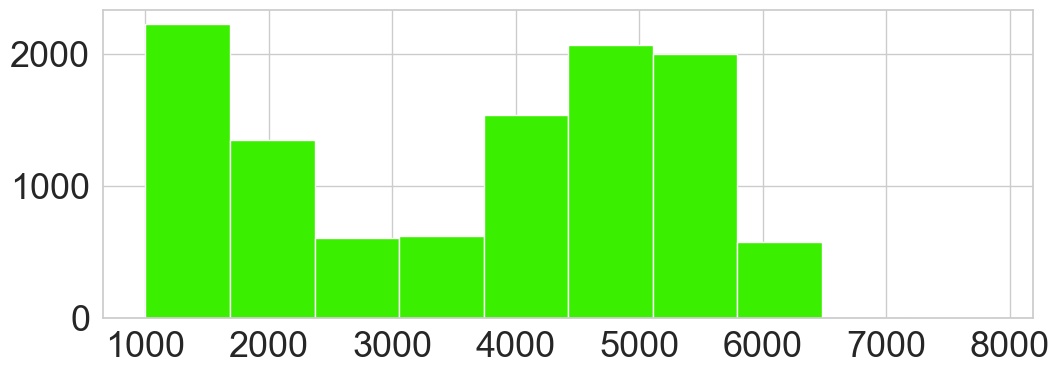

In [219]:
dataSet['peso_gramas'].hist()

## Explorando variáveis Categóricas

In [220]:
dataSet[cats].describe() # Describe diferente 

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


Algumas observações:

* Para a variável corredor_armazem **F** é a classe dominante.
* Para a variável de modo de envio **Navio** é a classe dominante.
* Para a variável de prioridade do produto **baixa** é a classe dominante.
* Para a variável de gênero, **F(Feminino)** é a classe dominante.
* Todos os valores únicos para cada categoria estão em torno de **2-5 valores únicos**

In [221]:
# Listando o total por categoria de cada variável categórica

for col in cats:
    print(f"\nTotal de Registros por categoria da variável {col}: ")
    print(dataSet[col].value_counts())


Total de Registros por categoria da variável corredor_armazem: 
corredor_armazem
F    3666
D    1834
C    1834
A    1833
B    1833
Name: count, dtype: int64

Total de Registros por categoria da variável modo_envio: 
modo_envio
Navio       7463
Aviao       1777
Caminhao    1760
Name: count, dtype: int64

Total de Registros por categoria da variável prioridade_produto: 
prioridade_produto
baixa    5298
media    4754
alta      948
Name: count, dtype: int64

Total de Registros por categoria da variável genero: 
genero
F    5546
M    5454
Name: count, dtype: int64


###### Após chegar a conclusão de que não existe problemas com as variáveis, seguir na análise exploratória

### Análise Univariada - Box PLots

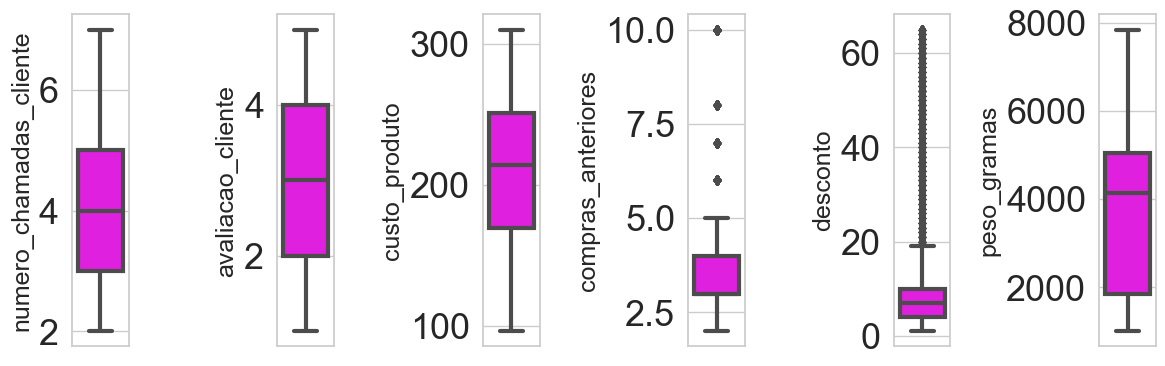

In [222]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = dataSet[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

### Análise Univariada - Dist PLots

In [223]:
features = nums
plt.figure(figsize = (20, 10))
for i in range(0, len(nums)):
    plt.subplot(3,len(nums)/2, i+1)
    sns.histplot(x = df[features[i]], kde = True, color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

ValueError: Number of columns must be a positive integer, not 3.0

<Figure size 2000x1000 with 0 Axes>

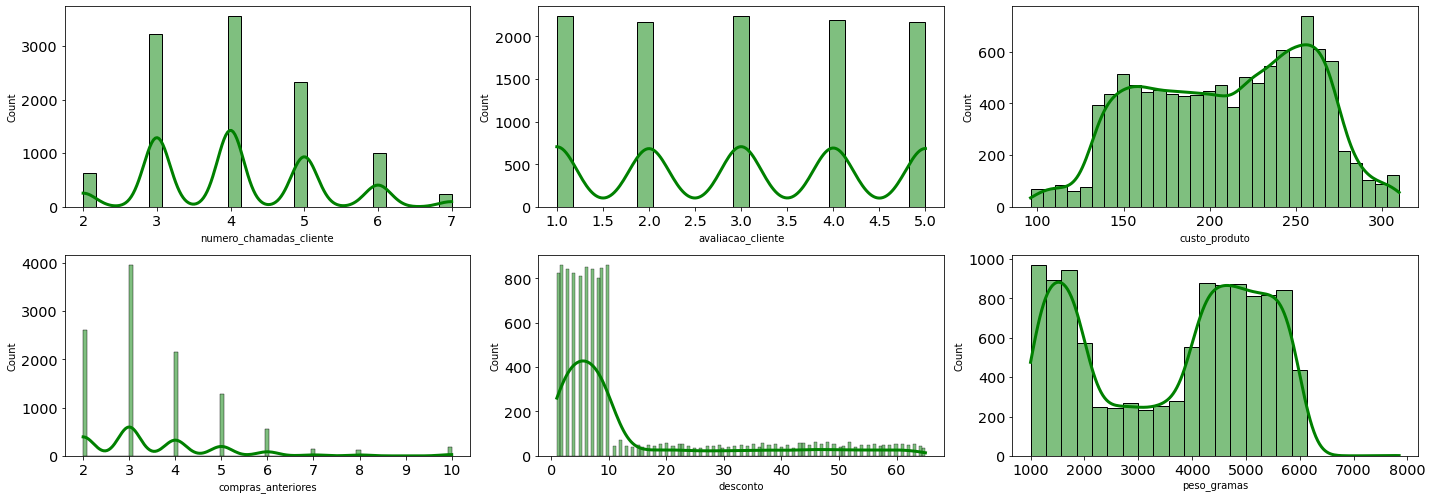

In [227]:
from IPython.display import Image
# Como está dando erro no código acima, por bug do notebook, está aqui a imagem
Image(filename='dados\output.png')

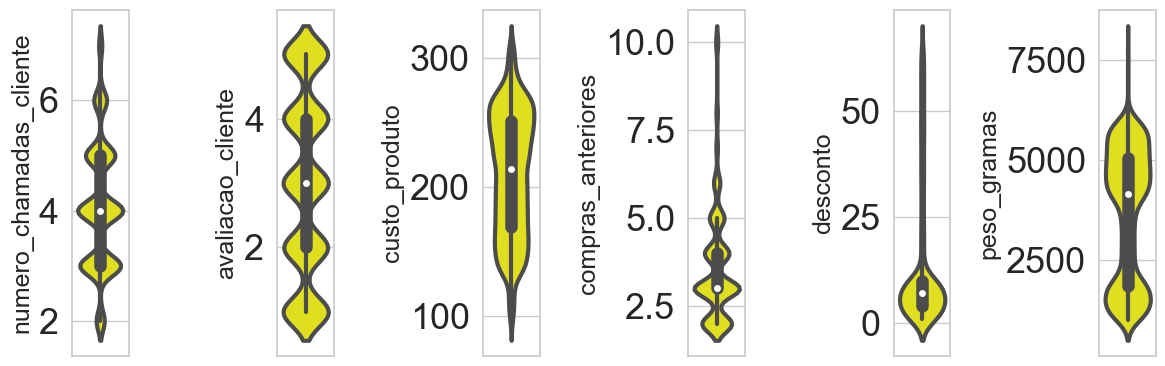

In [228]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y = dataSet[nums[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()

A partir dos gráficos pode-se observar que:
* A coluna `custo_produto` parece estar próxima de uma distribuição normal.
* Como suspeitamo, as colunas `compras_anteriores` e `desconto` estão ligeiramente *inclinadas*, o que significa que existe a possibilidade de precisarmos fazer algo com essas colunas mais tarde.
* Para a coluna `peso_gramas` há incerteza de distribuição porque é em forma de u.
* As colunas `numero_chamadas_cliente` e `avaliacao_cliente` estão distribuídas uniformemente.

### Análise Univariada - Count Plot (categorical)

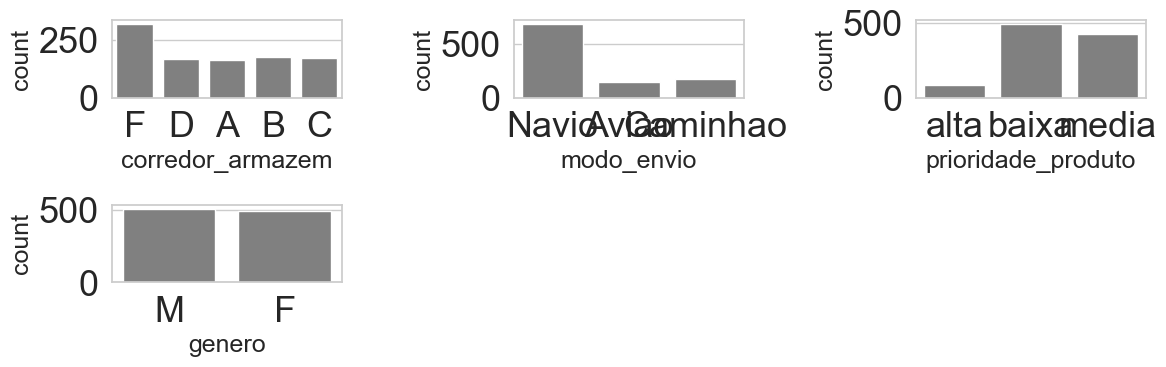

In [229]:
# Método Sample para retirar amostra válida do dataSet - Utilizar apenas 1000 linhas ao inves das 11k

dataSet_amostra = dataSet.sample(1000, random_state = 42)
for i in range(0, len(cats)):
    plt.subplot(2,3, i+1)
    sns.countplot(x = dataSet_amostra[cats[i]], color = 'grey', orient = 'v')
    plt.tight_layout()

<Axes: xlabel='entregue_no_prazo', ylabel='count'>

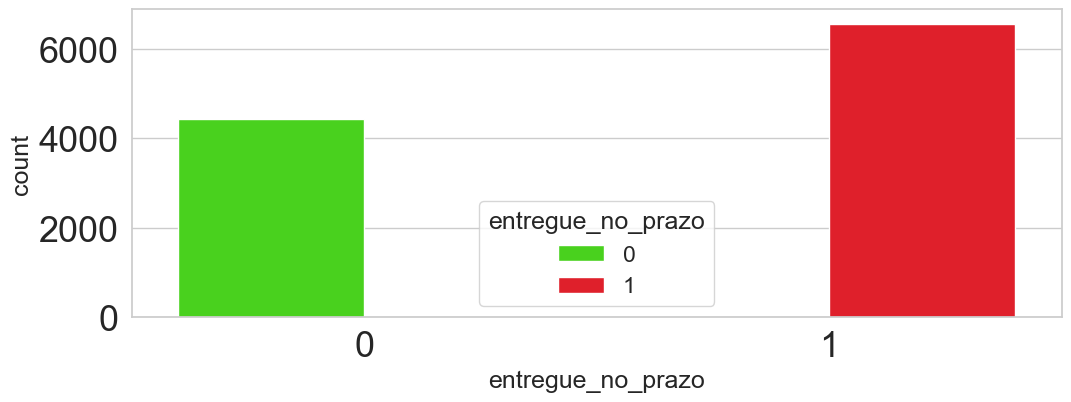

In [230]:
# Count plot na variável target
sns.countplot(data = dataSet, x = dataSet['entregue_no_prazo'], hue = 'entregue_no_prazo')

A partir dos gráficos pode-se observar que:

* A maioria dos produtos enviados vieram do corredor F.
* Modo de envio através de Navio é o mais comum.
* Há poucos produtos com prioridade alta de entrega.
* A proporção de clientes do sexo Masculino e Feminino é praticamente a mesma.
* A coluna `entregue_no_prazo` é binária, então não há necessidade de prestar muita atenção à forma da distribuição.

# Análise Bivariada -  Mapa de Correlação

In [231]:
dataSet[nums].corr()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


In [232]:
df_corr = dataSet[nums].corr()

<Axes: >

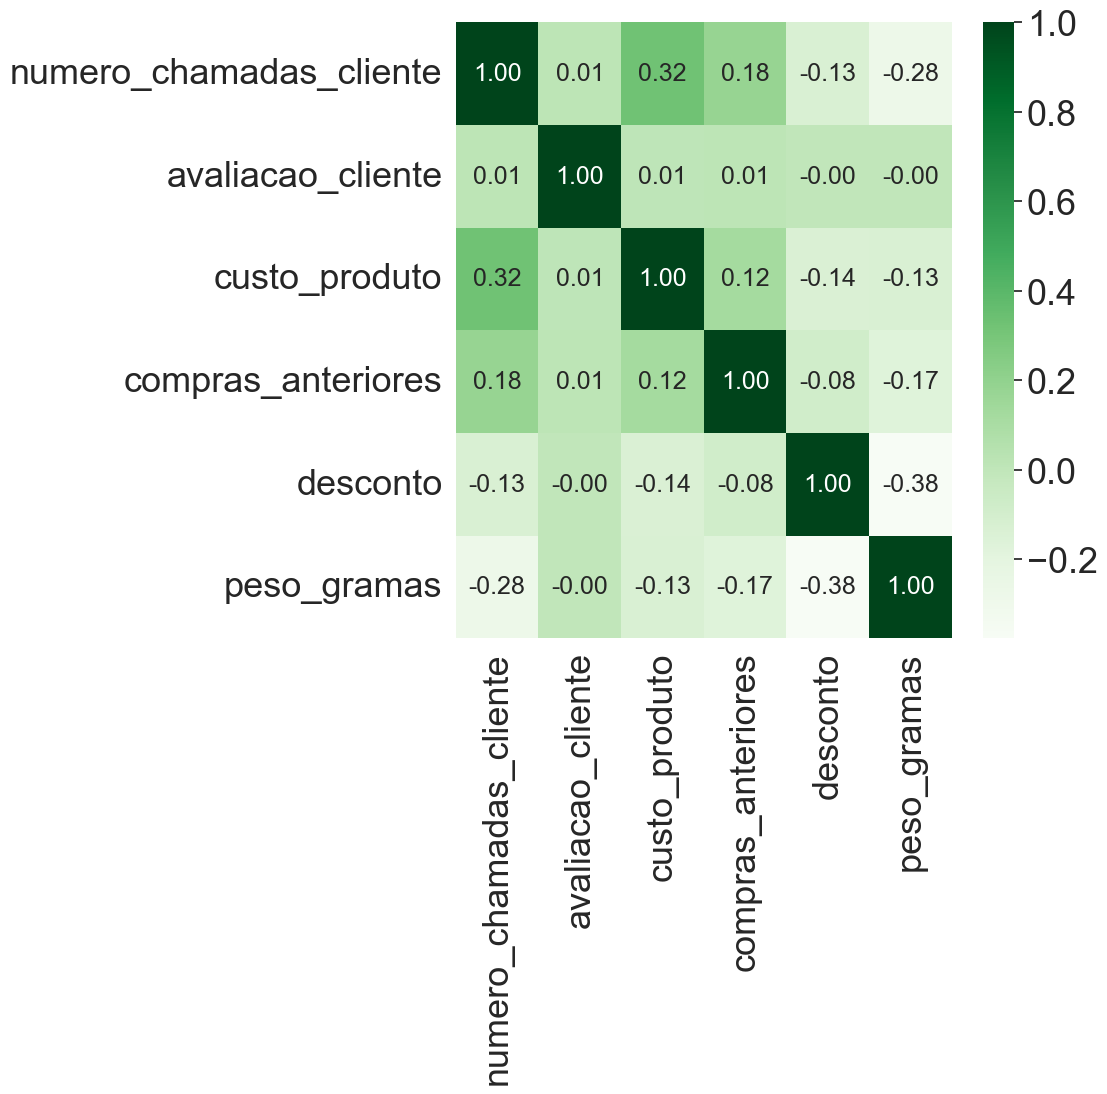

In [233]:
plt.figure(figsize = (8,8))
sns.heatmap(df_corr, cmap = 'Greens', annot = True, fmt = '.2f')

A partir do *mapa de correlação* acima, pode-se ver que:
* Há uma correlação positiva entre `numero_chamadas_cliente` e `custo_produto`.
* Há uma correlação positiva entre `numero_chamadas_cliente` e `compras_anteriores`.
* Há uma correlação negativa entre `desconto` e `peso_gramas`.
* E há uma correlação fraca entre as demais variáveis.
Obs: Não usamos correlação para variáveis categóricas. Nesse caso usamos associação.

## Análise Bivariada - Pair Plot

<Figure size 1500x1500 with 0 Axes>

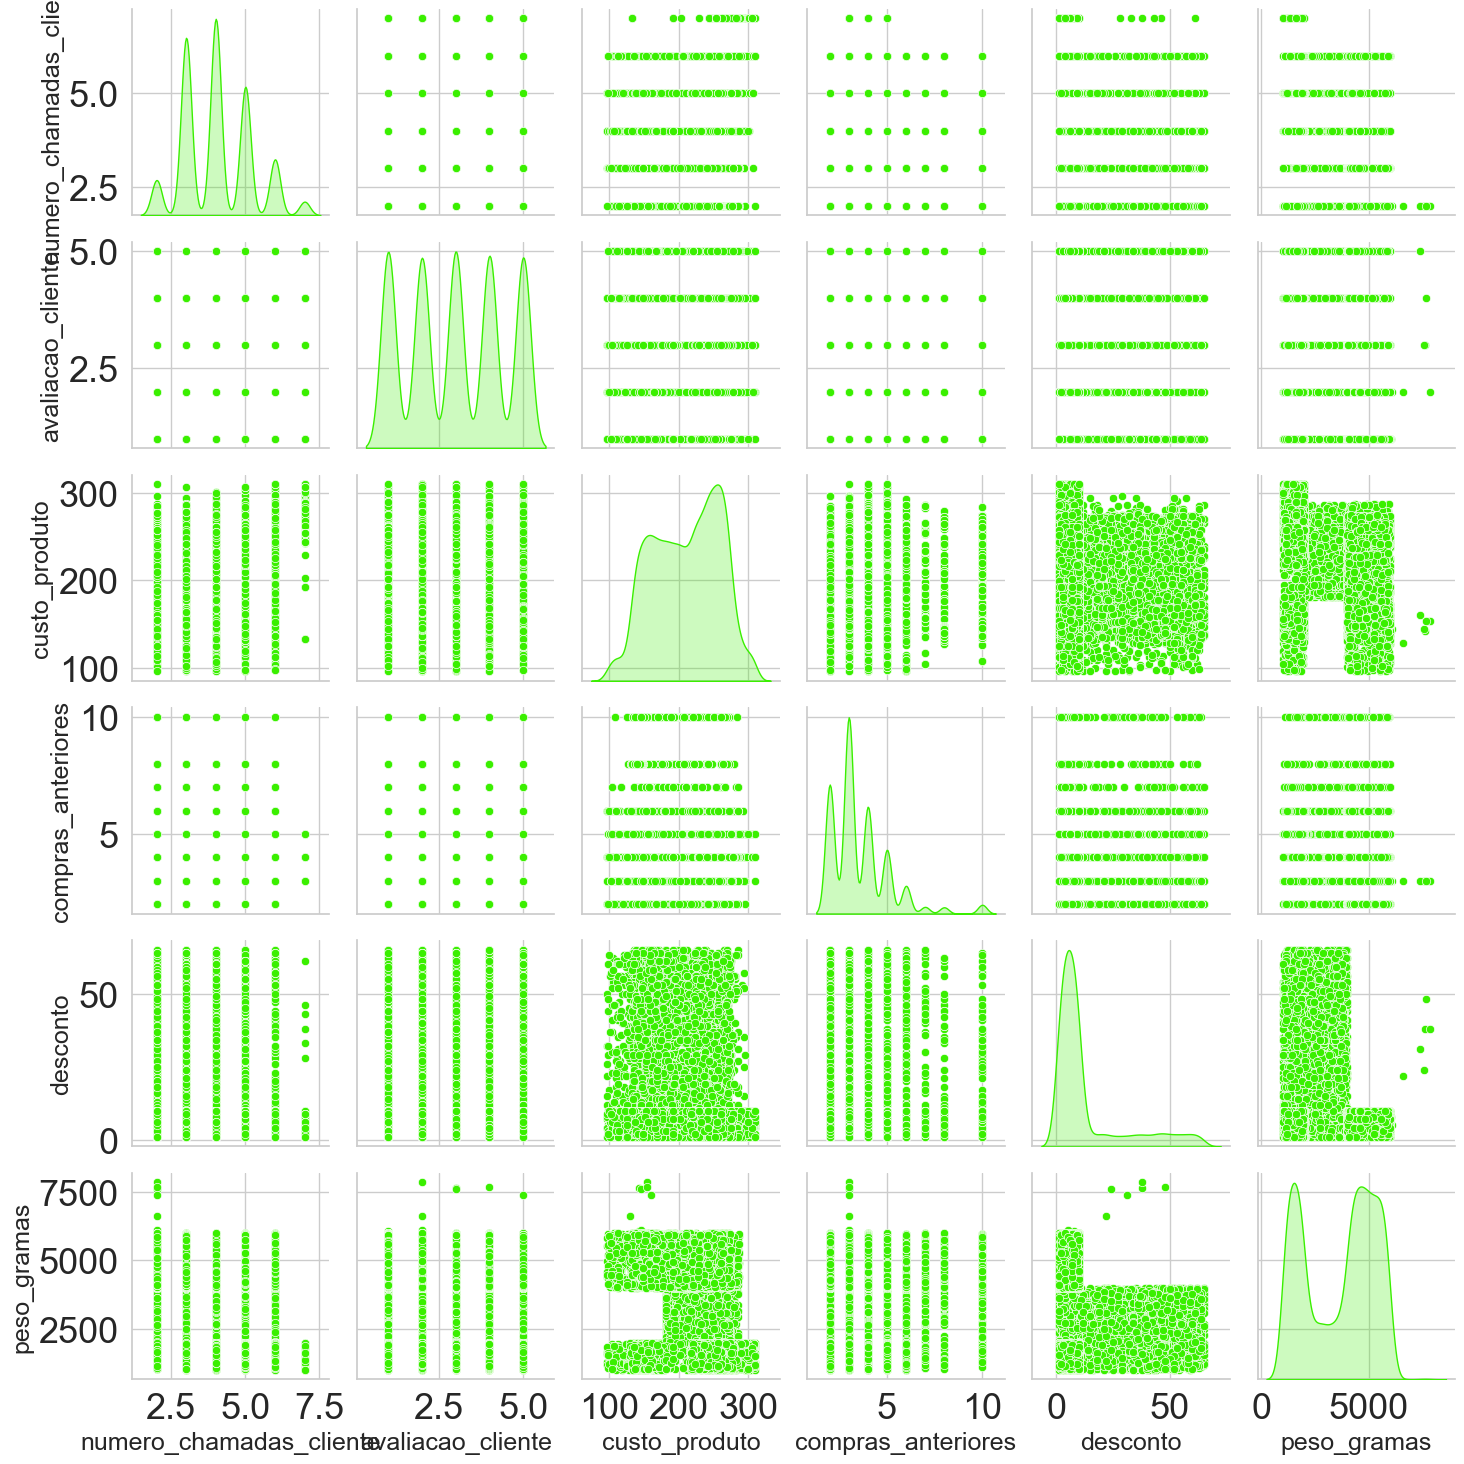

In [234]:
plt.figure(figsize = (15,15))
sns.pairplot(dataSet[nums], diag_kind ='kde')

## Colunas Categóricas - Variável Alvo

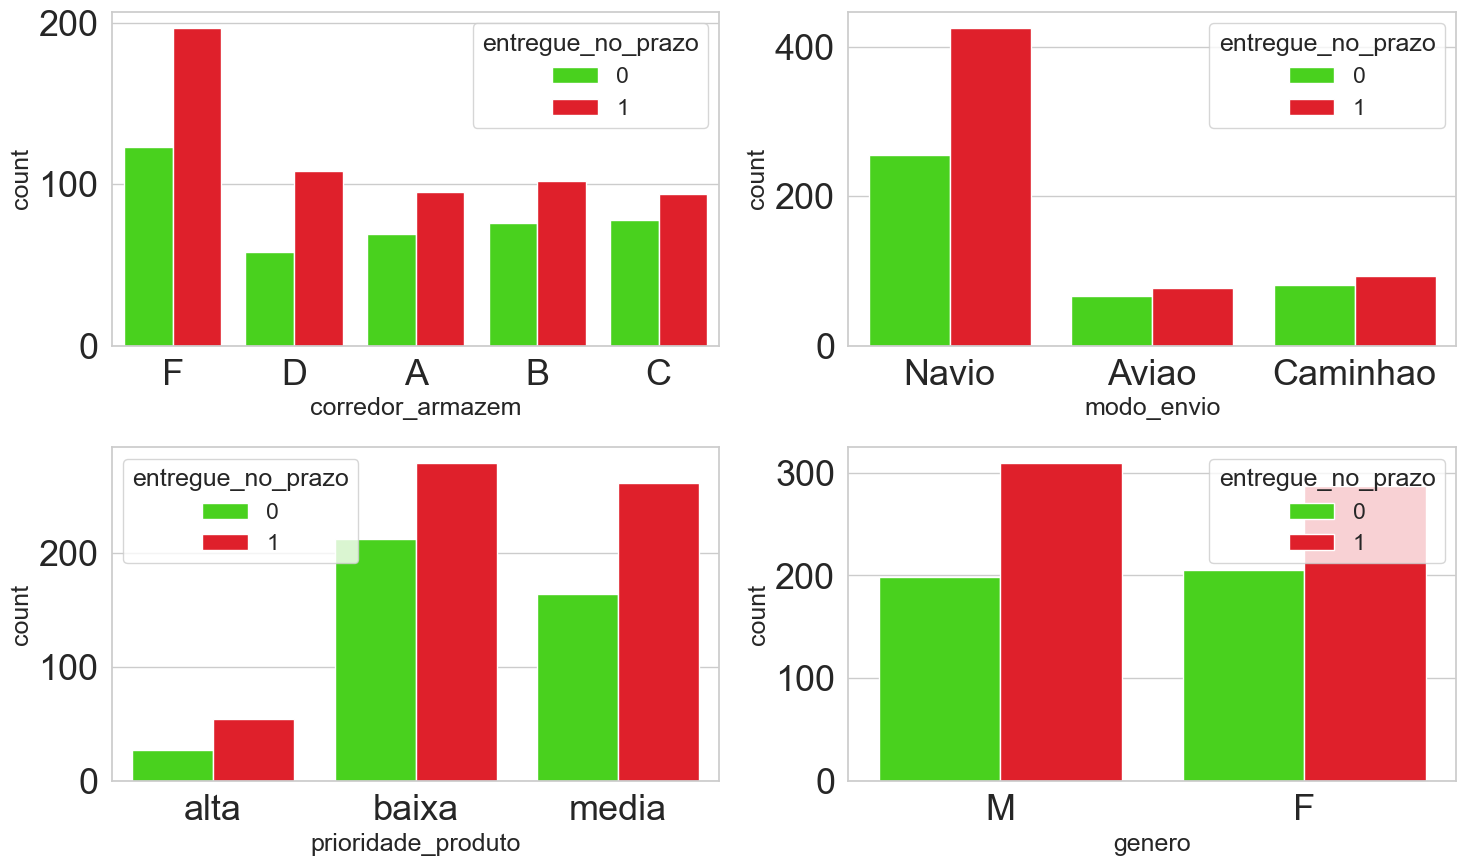

In [235]:
plt.figure(figsize = (15,9))
features = cats
for i in range(0, len(features)):
    plt.subplot(2,2, i+1) #2linhas 2 colunas
    sns.countplot(data = dataSet_amostra, x= features[i], hue='entregue_no_prazo') #hue= variavel alvo
    plt.tight_layout()

# EDA - PARTE 2

#### 1 - Os atrasos nas entregas estão igualmente distribuídos pelos modos de envio? Há diferenças discrepantes

In [236]:
dataSet.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [237]:
dataSet['modo_envio'].value_counts()

modo_envio
Navio       7463
Aviao       1777
Caminhao    1760
Name: count, dtype: int64

In [238]:
dataSet_group1 = dataSet.groupby(['modo_envio', 'entregue_no_prazo']).agg({'ID':'nunique'}).reset_index()
dataSet_group1

,modo_envio,entregue_no_prazo,ID
0,Aviao,0,708
1,Aviao,1,1069
2,Caminhao,0,725
3,Caminhao,1,1035
4,Navio,0,3004
5,Navio,1,4459


In [239]:
dataSet_group2 = dataSet.groupby('entregue_no_prazo').agg({'ID':'nunique'}).reset_index()
dataSet_group2

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [240]:
dataSet_group3 = dataSet_group1.merge(dataSet_group2, on = 'entregue_no_prazo')
dataSet_group3

,modo_envio,entregue_no_prazo,ID_x,ID_y
0,Aviao,0,708,4437
1,Caminhao,0,725,4437
2,Navio,0,3004,4437
3,Aviao,1,1069,6563
4,Caminhao,1,1035,6563
5,Navio,1,4459,6563


In [241]:
dataSet_group4 = dataSet.groupby('modo_envio').agg({'ID':'nunique'}).reset_index()
dataSet_group4

,modo_envio,ID
0,Aviao,1777
1,Caminhao,1760
2,Navio,7463


In [242]:
# Agrupando para chegar a um dataframe que contenha valores entregues no prazo e fora 
# e total por modal

dataSet_group5 = dataSet_group1.merge(dataSet_group4, on = 'modo_envio')
dataSet_group5

,modo_envio,entregue_no_prazo,ID_x,ID_y
0,Aviao,0,708,1777
1,Aviao,1,1069,1777
2,Caminhao,0,725,1760
3,Caminhao,1,1035,1760
4,Navio,0,3004,7463
5,Navio,1,4459,7463


In [243]:
# Criando a coluna de percentual para a entrega dos modais
dataSet_group5['Percentual(%)'] = dataSet_group5['ID_x'] / dataSet_group5['ID_y'] * 100

In [244]:
# Renomenado colunas de df5
dataSet_group5.columns = ['Modo de Envio',
                         'Status de Entrega no Prazo',
                         'Total Por Categoria',
                         'Total Geral',
                         'Percentual (%)']
dataSet_group5

,Modo de Envio,Status de Entrega no Prazo,Total Por Categoria,Total Geral,Percentual (%)
0,Aviao,0,708,1777,39.842431
1,Aviao,1,1069,1777,60.157569
2,Caminhao,0,725,1760,41.193182
3,Caminhao,1,1035,1760,58.806818
4,Navio,0,3004,7463,40.251909
5,Navio,1,4459,7463,59.748091


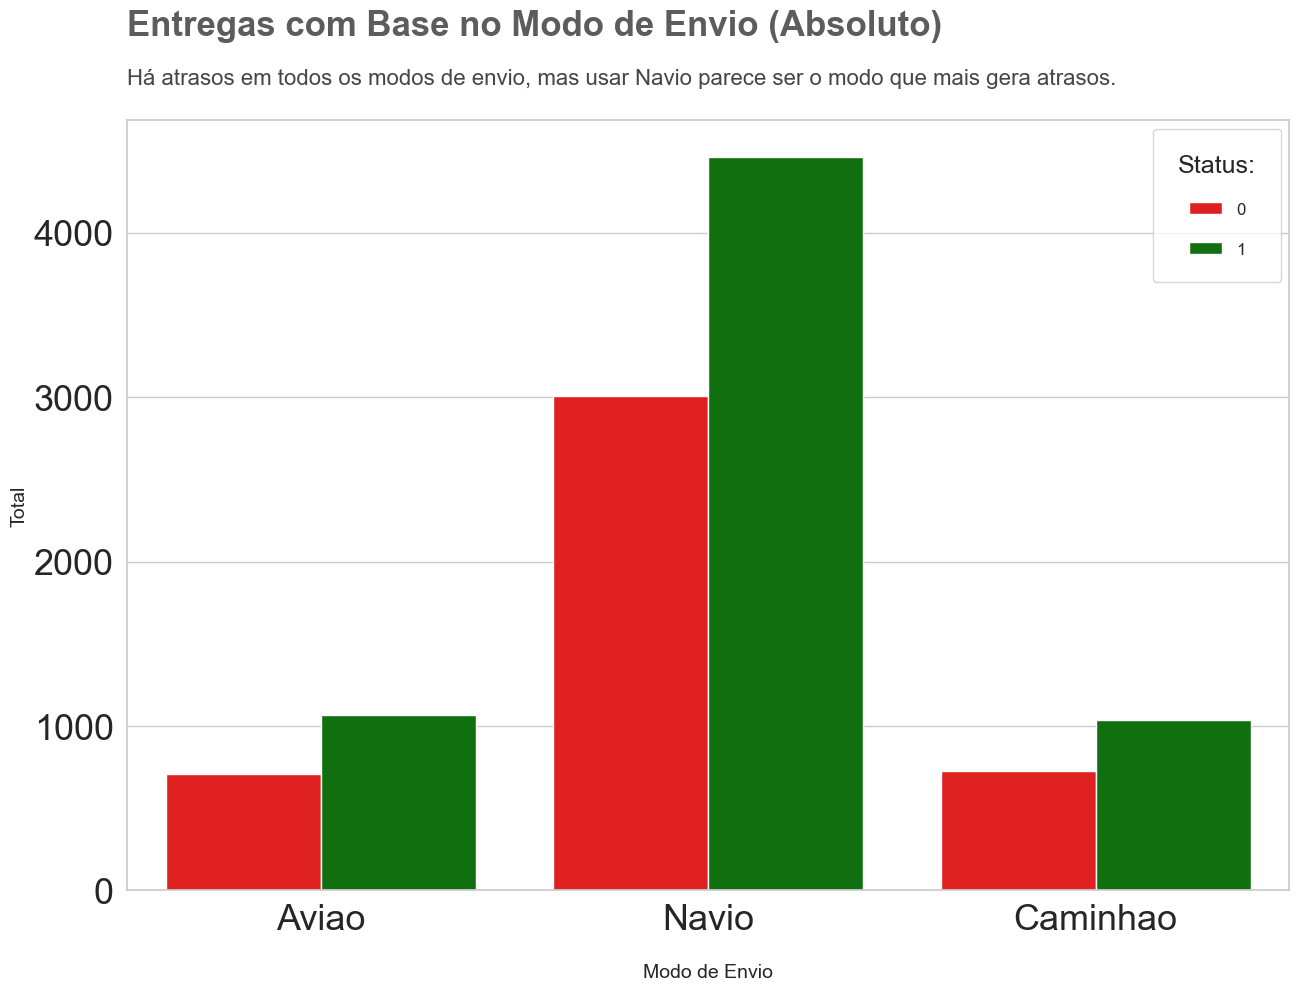

In [245]:
# Gráfico 1 - Análise em Valores Absolutos

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.countplot(data = dataSet, 
                      x = 'modo_envio', 
                      hue = 'entregue_no_prazo',
                      palette = ["red","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)

# Legenda
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')

# Adicionado Título 
chart.text(x = -0.5, 
           y = 5200, 
           s = "Entregas com Base no Modo de Envio (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Adicionado Sub-Título
chart.text(x = -0.5, 
           y = 4900,
           s = 'Há atrasos em todos os modos de envio, mas usar Navio parece ser o modo que mais gera atrasos.',
           fontsize = 16, 
           alpha = .85);

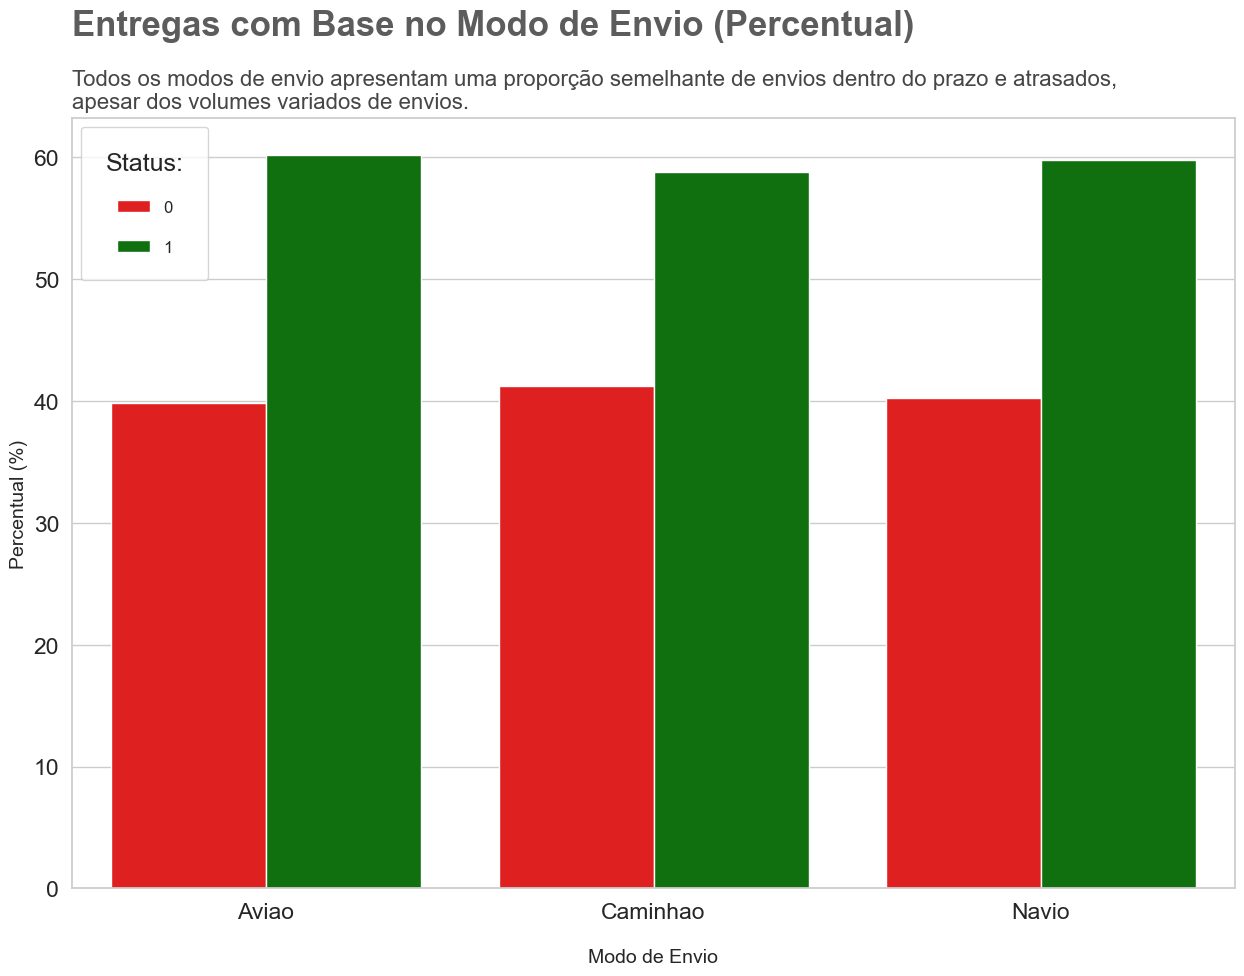

In [246]:
# Gráfico 2 - Análise em Valores Percentuais

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.barplot(x = 'Modo de Envio', 
                    y = 'Percentual (%)', 
                    data = dataSet_group5, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "Entregas com Base no Modo de Envio (Percentual)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = 'Todos os modos de envio apresentam uma proporção semelhante de envios dentro do prazo e atrasados, \napesar dos volumes variados de envios.',
           fontsize = 16, 
           alpha = .85);

## 2 - Há diferença significativa no atraso das entregas quando o produto tem prioridade baixa ou média?

In [247]:
dataSet.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [248]:
df_group11 = dataSet.groupby(['entregue_no_prazo','prioridade_produto']).agg({'ID':'nunique'}).reset_index()
df_group11

,entregue_no_prazo,prioridade_produto,ID
0,0,alta,332
1,0,baixa,2158
2,0,media,1947
3,1,alta,616
4,1,baixa,3140
5,1,media,2807


In [249]:
df_group12 = dataSet.groupby('entregue_no_prazo').agg({'ID':'nunique'}).reset_index()
df_group12

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [250]:
df_group13 = df_group11.merge(df_group12, on = 'entregue_no_prazo')
df_group13

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,4437
1,0,baixa,2158,4437
2,0,media,1947,4437
3,1,alta,616,6563
4,1,baixa,3140,6563
5,1,media,2807,6563


In [251]:
df_group14 = dataSet.groupby('prioridade_produto').agg({'ID':'nunique'}).reset_index()
df_group14

,prioridade_produto,ID
0,alta,948
1,baixa,5298
2,media,4754


In [252]:
df_group15 = df_group11.merge(df_group14, on = 'prioridade_produto')
df_group15

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,948
1,1,alta,616,948
2,0,baixa,2158,5298
3,1,baixa,3140,5298
4,0,media,1947,4754
5,1,media,2807,4754


#### Criando percentual para as duas tabelas - df_group13 (total) / df_group15 (total por cat)

In [253]:
df_group13['Percentual(%)'] = df_group13['ID_x'] / df_group13['ID_y']
df_group13.columns = ['Status de Entrega no Prazo', 
                      'Prioridade do Produto', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group13

,Status de Entrega no Prazo,Prioridade do Produto,Total Por Categoria,Total Geral,Percentual(%)
0,0,alta,332,4437,0.074825
1,0,baixa,2158,4437,0.486365
2,0,media,1947,4437,0.438810
3,1,alta,616,6563,0.093860
4,1,baixa,3140,6563,0.478440
5,1,media,2807,6563,0.427701


In [257]:
df_group15['Percentual(%)'] = df_group15['ID_x'] / df_group15['ID_y'] * 100
df_group15.columns = ['Status de Entrega no Prazo',
                     'Prioridade do Produto',
                     'Total Por Categoria',
                     'Total Geral',
                     'Percentual(%)']
print(df_group15)

   Status de Entrega no Prazo Prioridade do Produto  Total Por Categoria  \
0                           0                  alta                  332   
1                           1                  alta                  616   
2                           0                 baixa                 2158   
3                           1                 baixa                 3140   
4                           0                 media                 1947   
5                           1                 media                 2807   

   Total Geral  Percentual(%)  
0          948      35.021097  
1          948      64.978903  
2         5298      40.732352  
3         5298      59.267648  
4         4754      40.954985  
5         4754      59.045015  


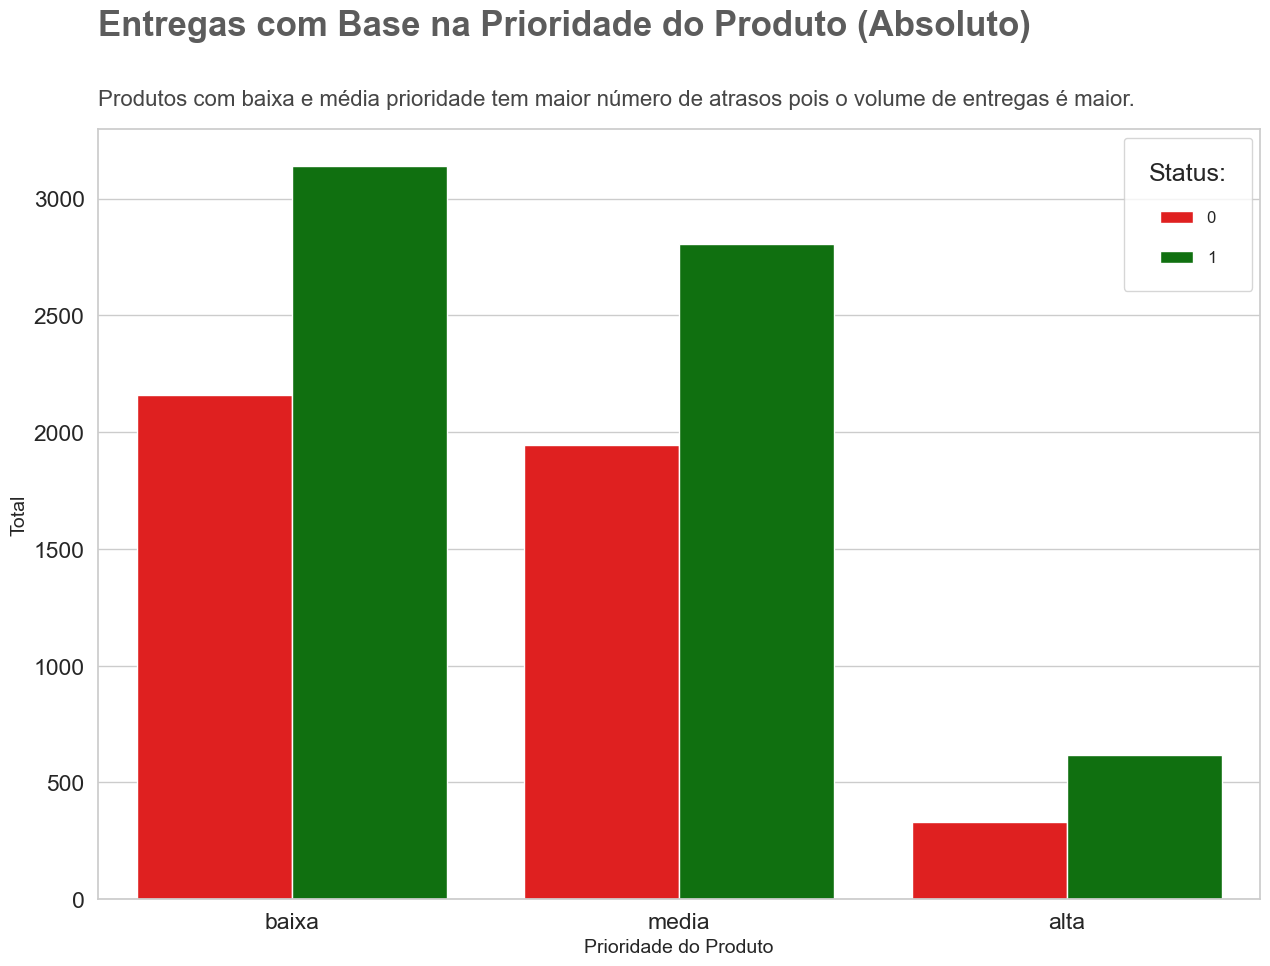

In [259]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = dataSet, 
                      x = 'prioridade_produto', 
                      hue = 'entregue_no_prazo',
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Prioridade do Produto", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 3700, 
           s = "Entregas com Base na Prioridade do Produto (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 3400,
           s = 'Produtos com baixa e média prioridade tem maior número de atrasos pois o volume de entregas é maior.',
           fontsize = 16, 
           alpha = .85);

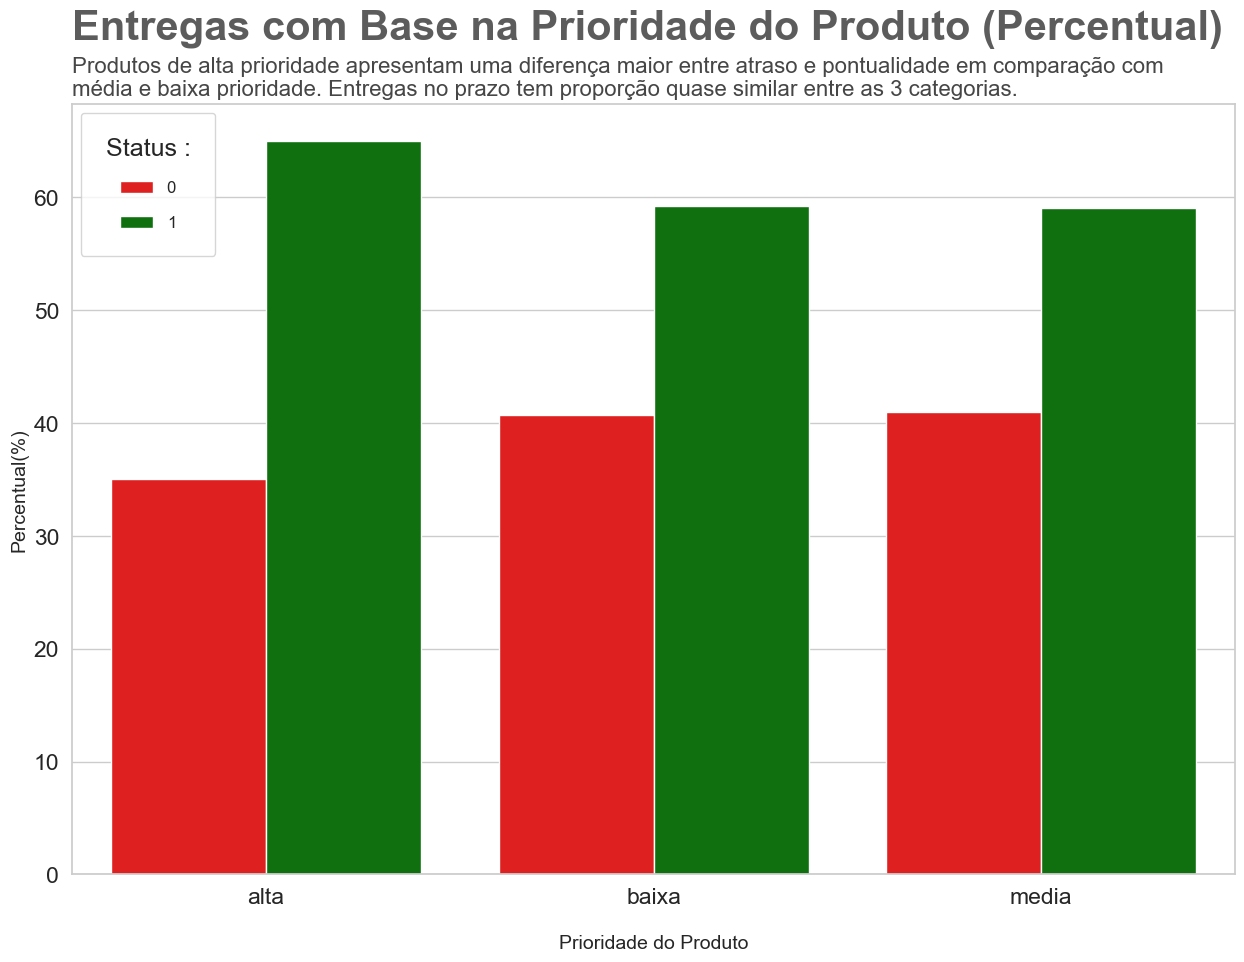

In [260]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Prioridade do Produto', 
                    y = 'Percentual(%)', 
                    data = df_group15, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nPrioridade do Produto", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status :')
chart.text(x = -0.5, 
           y = 74, 
           s = "Entregas com Base na Prioridade do Produto (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 69,
           s = 'Produtos de alta prioridade apresentam uma diferença maior entre atraso e pontualidade em comparação com \nmédia e baixa prioridade. Entregas no prazo tem proporção quase similar entre as 3 categorias.',
           fontsize = 16, 
           alpha = .85);

### 03 - Quais corredores armazenam produtos com maior proporção de entregas com atraso?

In [261]:
dataSet.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [262]:
df_group21 = dataSet.groupby(['entregue_no_prazo','corredor_armazem']).agg({'ID':'nunique'}).reset_index()
df_group21

,entregue_no_prazo,corredor_armazem,ID
0,0,A,758
1,0,B,729
2,0,C,740
3,0,D,738
4,0,F,1472
5,1,A,1075
6,1,B,1104
7,1,C,1094
8,1,D,1096
9,1,F,2194


In [270]:
df_group22 = dataSet.groupby('corredor_armazem').agg({'ID':'nunique'}).reset_index()
df_group22

,corredor_armazem,ID
0,A,1833
1,B,1833
2,C,1834
3,D,1834
4,F,3666


In [271]:
df_group23 = df_group21.merge(df_group22, on = 'corredor_armazem')
df_group23

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,1833
1,1,A,1075,1833
2,0,B,729,1833
3,1,B,1104,1833
4,0,C,740,1834
5,1,C,1094,1834
6,0,D,738,1834
7,1,D,1096,1834
8,0,F,1472,3666
9,1,F,2194,3666


In [272]:
df_group23['Pecentual(%)'] = df_group23['ID_x']/df_group23['ID_y'] *100

In [273]:
df_group23.columns = ['Status de Entrega no Prazo',
                     'Corredor do Armazem',
                     'Total Por Categoria',
                     'Total Geral',
                     'Percentual(%)']
df_group23

,Status de Entrega no Prazo,Corredor do Armazem,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,1833,41.352973
1,1,A,1075,1833,58.647027
2,0,B,729,1833,39.770867
3,1,B,1104,1833,60.229133
4,0,C,740,1834,40.348964
5,1,C,1094,1834,59.651036
6,0,D,738,1834,40.239913
7,1,D,1096,1834,59.760087
8,0,F,1472,3666,40.152755
9,1,F,2194,3666,59.847245


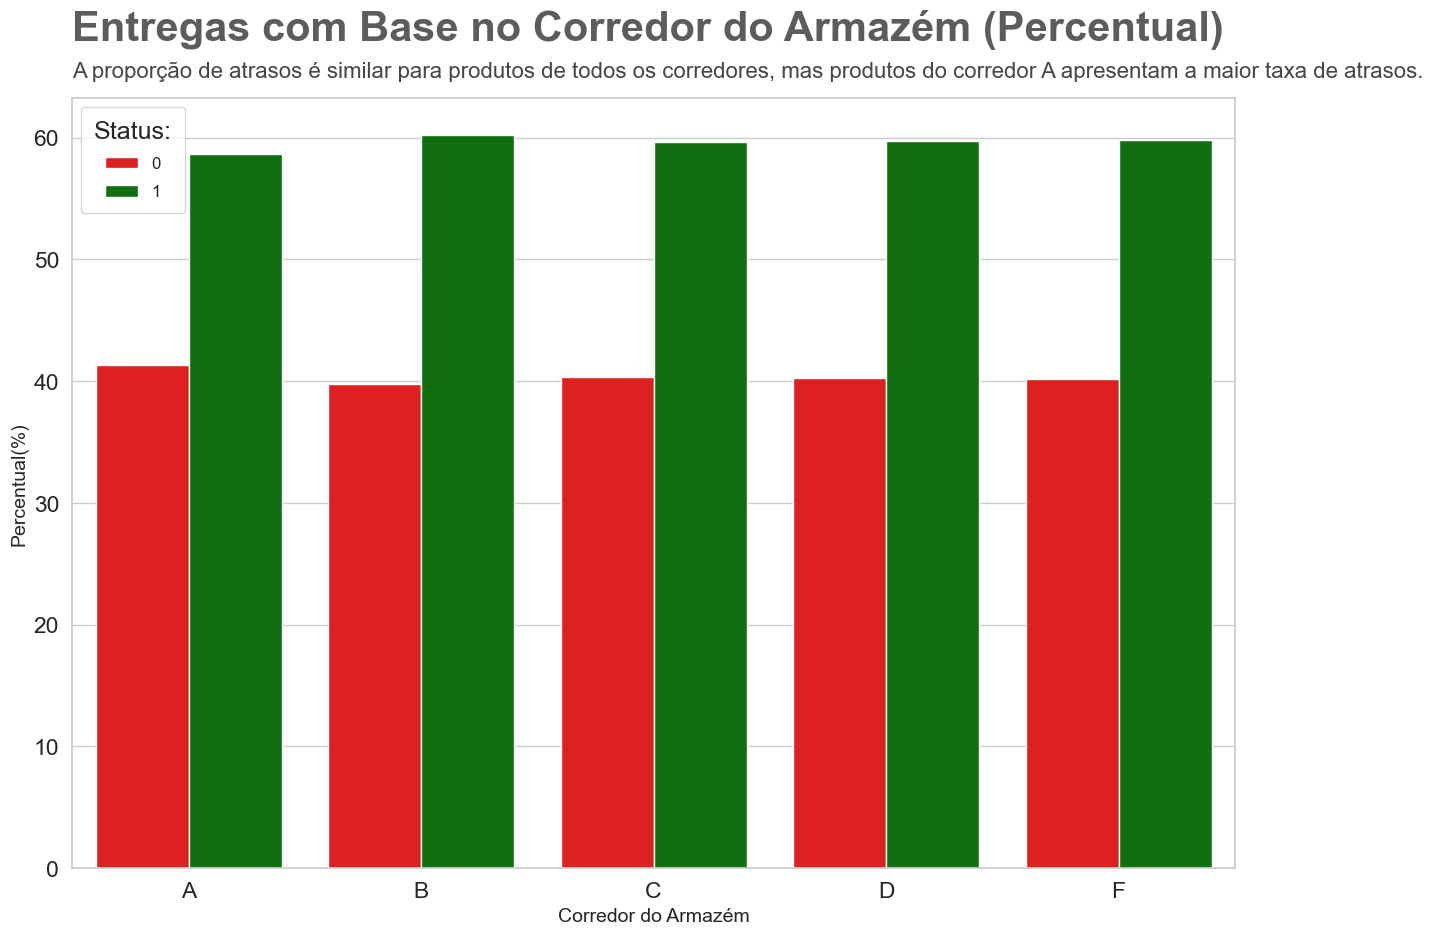

In [275]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Corredor do Armazem', 
                    y = 'Percentual(%)', 
                    data = df_group23, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 0.8, 
           labelspacing = 0.8, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 68, 
           s = "Entregas com Base no Corredor do Armazém (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 65,
           s = 'A proporção de atrasos é similar para produtos de todos os corredores, mas produtos do corredor A apresentam a maior taxa de atrasos.',
           fontsize = 16, 
           alpha = .85);

### Desafio Ninja:

### Como a densidade da variável que representa desconto influencia o status de entrega dos produtos?

Responda com apenas um gráfico em uma única linha de código!

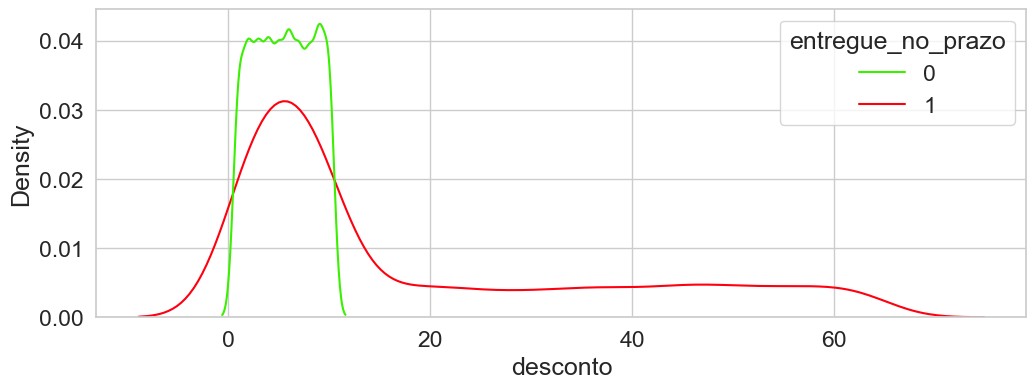

In [283]:
sns.kdeplot(data = dataSet, x = 'desconto', hue = 'entregue_no_prazo');

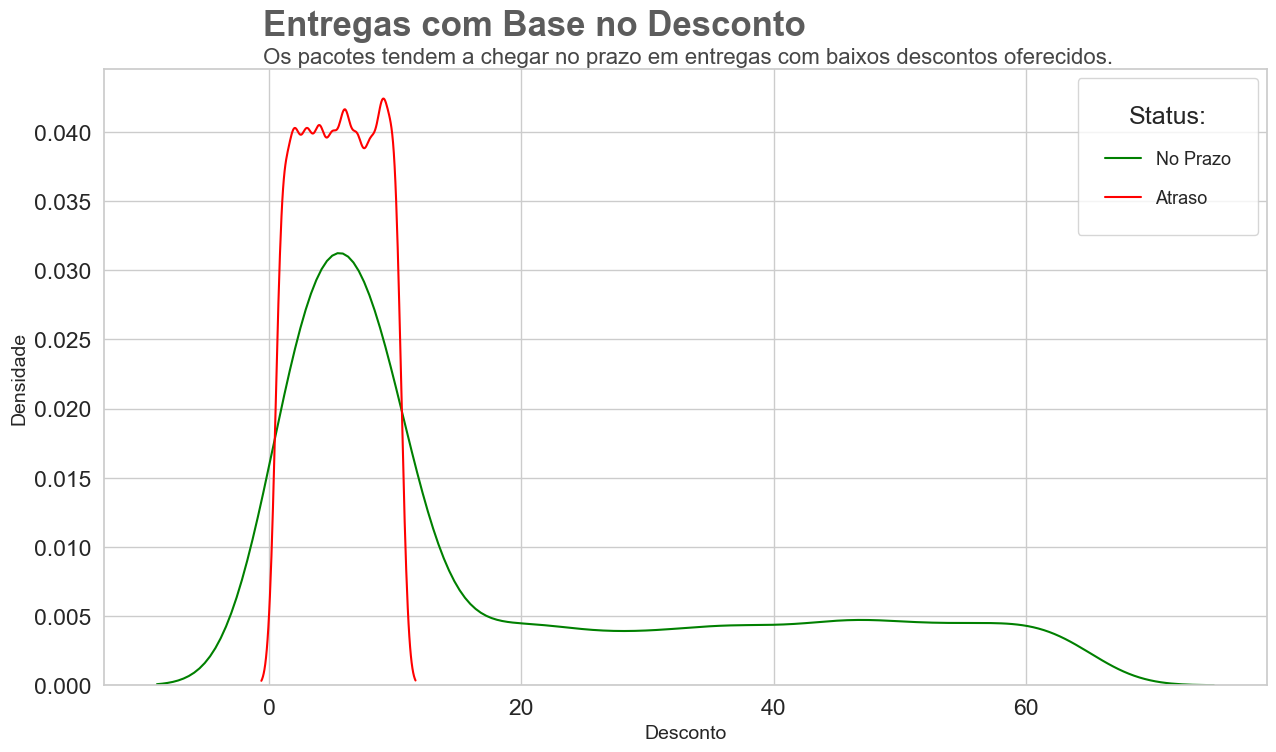

In [284]:
# Resposta com gráfico formatado
plt.figure(figsize = (15,8))
chart = sns.kdeplot(data = dataSet, 
                    x = 'desconto',
                    hue = 'entregue_no_prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('white')
sns.set_palette('prism')
chart.set_xlabel("Desconto", fontsize = 14)
chart.set_ylabel("Densidade", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 13, 
           title = 'Status:', 
           labels = ['No Prazo', 'Atraso'])
chart.text(x = -0.5, 
           y = 0.047, 
           s = "Entregas com Base no Desconto",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 0.045,
           s = 'Os pacotes tendem a chegar no prazo em entregas com baixos descontos oferecidos.',
           fontsize = 16, 
           alpha = .85);